### Linear regression model

$X \in R_{d + 1 \times n}$, $W \in R_{d + 1 \times 1}$, $Y \in R_{n \times 1}$

1. Hypothesis :
$\mathcal{H} = X^T W \approx Y$


2. Cost function :
$\mathcal{L}(W) = ||Y - X^T W||^2_2 \div 2n$


3. Cost function derivative :
$\nabla_W \mathcal{L}(W) = X(X^T W - Y) \div n$

### Gradient descent algorithm

1. Initialize weight w to any random number : $W_0 = \Theta$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.


3. Repeat until convergense :  $ W_{t+1} = W_t - \eta ~ \mathcal{L}'(W_t)$

### Simple example : $Y = 4 + 3X$

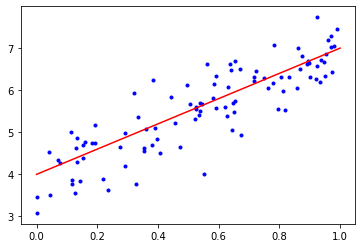

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# number of example in training set
N = 100
# X, uniform distribution
_X = np.random.rand(N)
# Noise, gauss distribution
noise = np.random.randn(N)
# Y, Y = 4 + 3X
_y = 4 + 3*_X + noise/2

# visualize data
dom = np.linspace(0, 1, 100)
val = [4 + 3*x for x in dom]
plt.plot(dom, val, c='red')
plt.scatter(_X, _y, c='blue', marker='.')

plt.show()

# Reshape X, y
X = _X.reshape(1, N)
y = _y.reshape(N, 1)
# Add bias
one_mtr = np.ones((1, X.shape[1]))
X = np.concatenate((one_mtr, X))

In [72]:
# Cost function
def cost(w):
    N = X.shape[1]
    return (.5/N) * np.linalg.norm(y - X.T.dot(w))**2

# Derivative function
def grad(w):
    N = X.shape[1]
    return (1/N) * X.dot(X.T.dot(w) - y)

# Traditional gradient descent
def simpleGD(w_init, grad, eta, loop):
    w = [w_init]
    for it in range(loop):
        w_new = w[-1] - eta*grad(w[-1])
        grad_value = np.linalg.norm(grad(w_new))
        if grad_value/len(w_new) < 1e-3: break
        w.append(w_new)
    return (w, it)

w =  [[3.83640729 3.14385203]] after 59 iterations.


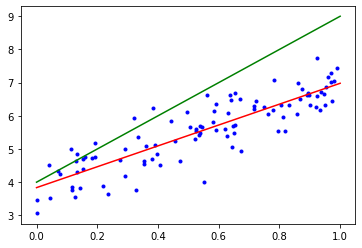

In [73]:
w_init = np.array([[4], [5]])
(w, it) = simpleGD(w_init, grad, 1, 100)
print('w = ', w[-1].T, 'after %d iterations.'%(it+1))

# visualize data
dom = np.linspace(0, 1, 100)
val = [w[-1][0][0] + w[-1][1][0]*x for x in dom]
plt.plot(dom, val, c='red')
dom = np.linspace(0, 1, 100)
val = [w[0][0][0] + w[0][1][0]*x for x in dom]
plt.plot(dom, val, c='green')
plt.scatter(_X, _y, c='blue', marker='.')

plt.show()